In [1]:
#!pip install seaborn
#!pip install matplotlib
#!pip install ucimlrepo
#!pip install scikit-learn
#!pip install torch

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.neural_network import MLPRegressor
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
###Data cleaing
## Loading data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  

In [4]:
data = X.join(y, how = 'inner')

In [5]:
data.info()
# No empty value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
## Data cleaning
#Converting Sex to number
data['Sex'] = data['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

#Replacing infant to male or female randomly based on the proportion of male and female in data
# num_M = (data['Sex'] == 0).sum()
# num_F = (data['Sex'] == 1).sum()
# total = num_M + num_F
# prob_M = num_M / total
# prob_F = num_F / total

# def replace_infant(X):
#     if X == -1:
#         return np.random.choice([0, 1], p=[prob_M, prob_F])
#     return X

# data['Sex'] = data['Sex'].apply(replace_infant)

print(data)

      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100     

C:\Users\27148\AppData\Local\Temp\ipykernel_28192\1488362678.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'M': 0, 'F': 1, 'I': 2})


In [7]:
#Checking outlier
outliers = {}
for column in data.columns:
    if (data[column] <= 0).any():
        print(data[column])
        
#Variable 'Height' has value <= 0, which should be deleted. Ignore variable 'Sex'        

newdata = data[data['Height'] > 0]
print(newdata)

#2 rows with height = 0 are deleted

0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64
0       0.095
1       0.090
2       0.135
3       0.125
4       0.080
        ...  
4172    0.165
4173    0.135
4174    0.205
4175    0.150
4176    0.195
Name: Height, Length: 4177, dtype: float64
      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.20

In [8]:
cor_matrix = newdata.corr()


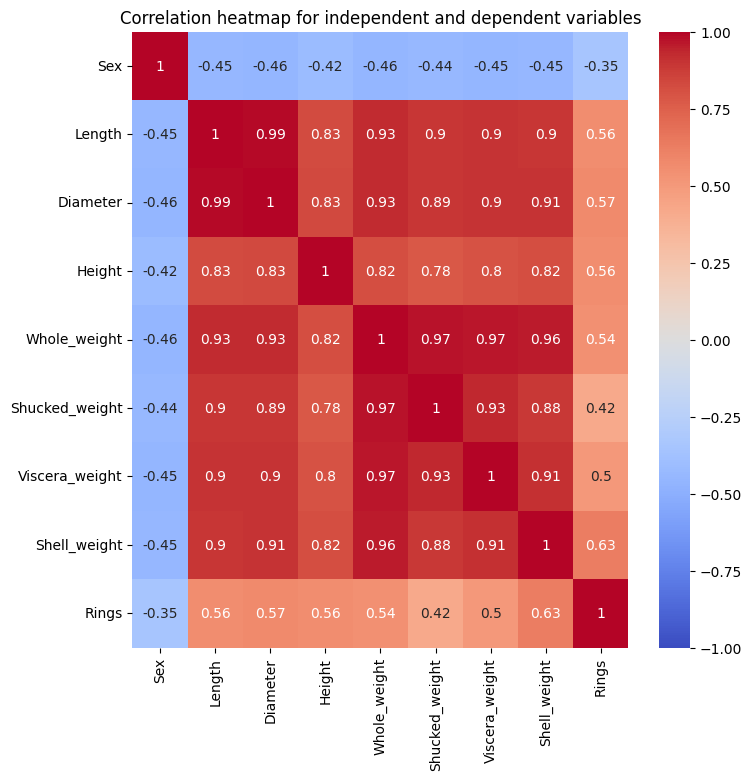

In [9]:
#Correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(cor_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation heatmap for independent and dependent variables')
plt.savefig('C:/Users/27148/Desktop/jupyter/correlationheatmap.png')
plt.show()

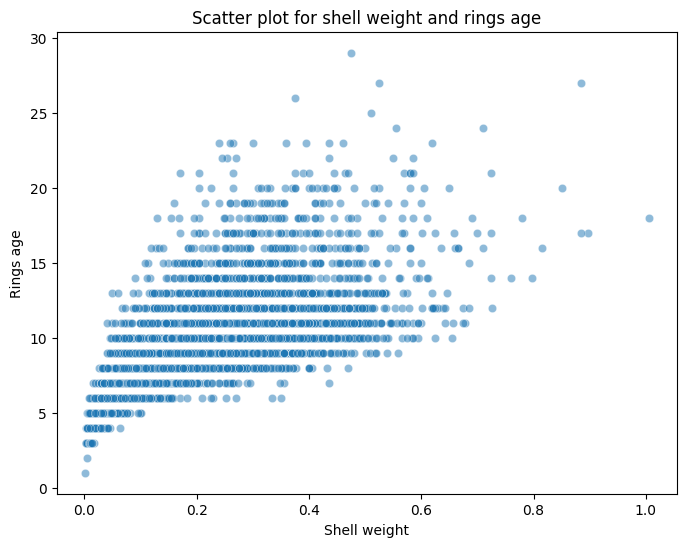

In [10]:
#scartter plot: Shell_weight and Rings
plt.figure(figsize=(8,6))
sns.scatterplot(data = newdata, x = 'Shell_weight', y = 'Rings', alpha = 0.5)
plt.title('Scatter plot for shell weight and rings age')
plt.xlabel('Shell weight')
plt.ylabel('Rings age')
plt.savefig('C:/Users/27148/Desktop/jupyter/scatterplot.png')
plt.show()
#Violation of homoscedasticity(no constant variance), linear model is not appropriate

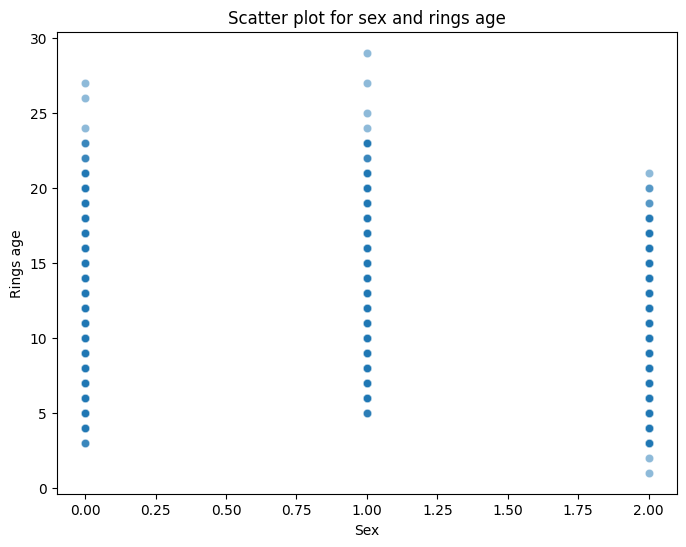

In [11]:
#scartter plot: Sex and Rings
plt.figure(figsize=(8,6))
sns.scatterplot(data = newdata, x = 'Sex', y = 'Rings', alpha = 0.5)
plt.title('Scatter plot for sex and rings age')
plt.xlabel('Sex')
plt.ylabel('Rings age')
plt.savefig('C:/Users/27148/Desktop/jupyter/scatterplot2.png')
plt.show()

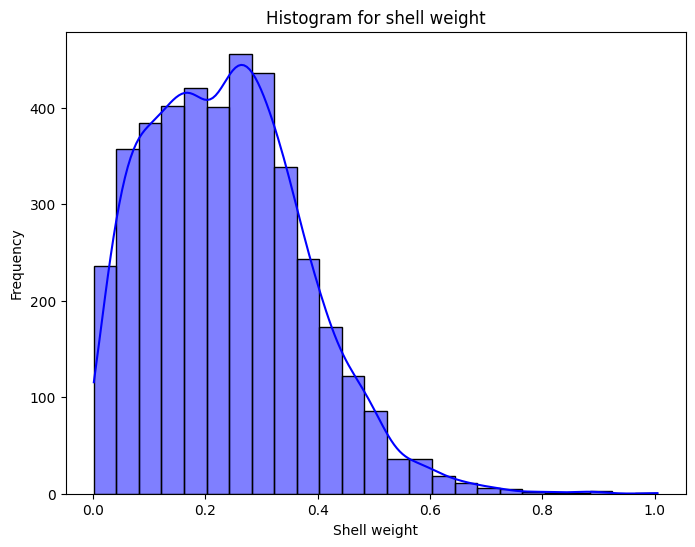

In [12]:
#histogram for shell weight
plt.figure(figsize=(8,6))
sns.histplot(data = newdata['Shell_weight'], bins = 25, kde = True, color = 'blue')
plt.title('Histogram for shell weight')
plt.xlabel('Shell weight')
plt.ylabel('Frequency')
plt.savefig('C:/Users/27148/Desktop/jupyter/histogram1.png')
plt.show()
#The distribution is right skewed, does not follow normal distribution

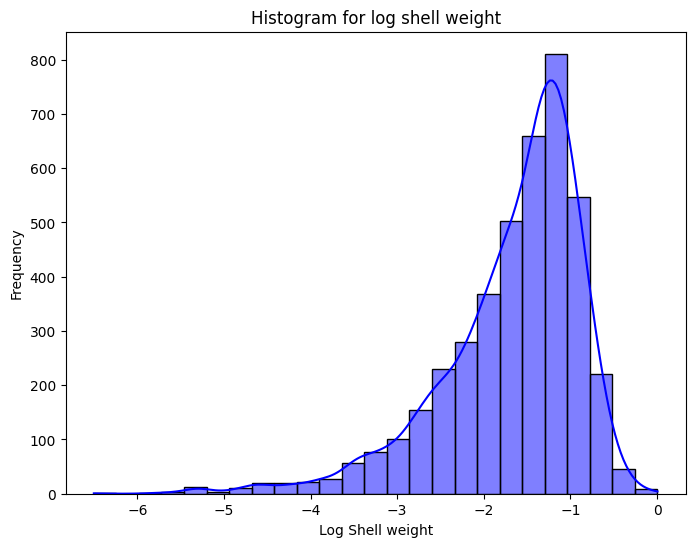

In [13]:
#histogram for log shell weight
plt.figure(figsize=(8,6))
sns.histplot(data = np.log(newdata['Shell_weight']), bins = 25, kde = True, color = 'blue')
plt.title('Histogram for log shell weight')
plt.xlabel('Log Shell weight')
plt.ylabel('Frequency')
plt.savefig('C:/Users/27148/Desktop/jupyter/histogram2.png')
plt.show()

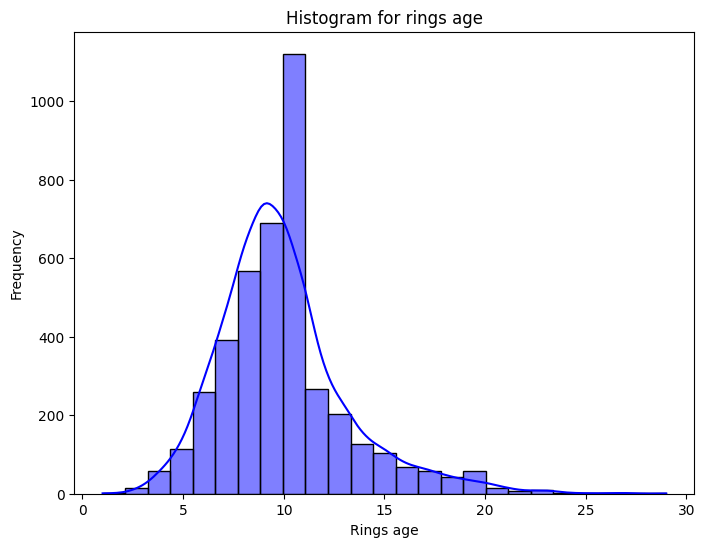

In [14]:
#histogram for rings age
plt.figure(figsize=(8,6))
sns.histplot(data = newdata['Rings'], bins = 25, kde = True, color = 'blue')
plt.title('Histogram for rings age')
plt.xlabel('Rings age')
plt.ylabel('Frequency')
plt.savefig('C:/Users/27148/Desktop/jupyter/histogram3.png')
plt.show()

In [15]:
#Saperating data
seed = 1218
X = newdata.drop(columns = ['Rings'])
y = newdata['Rings']
for i in range(1,31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = (seed + i))

In [16]:
###Modeling
#Linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_

for feature, coef in zip(X_train.columns, coefficients):
    print(f'{feature}: {coef}')
print(f'intercep: {intercept}')

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'\nR^2: {r_squared}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Sex: -0.34563747275070894
Length: -1.334576218277703
Diameter: 13.610430584513173
Height: 8.844066851922607
Whole_weight: 8.746172458809285
Shucked_weight: -19.792169526384825
Viscera_weight: -8.403719705232145
Shell_weight: 8.090113073139701
intercep: 3.6290651571528576

R^2: 0.5330249438297476
MSE: 4.847257845406587
RMSE: 2.2016488924001


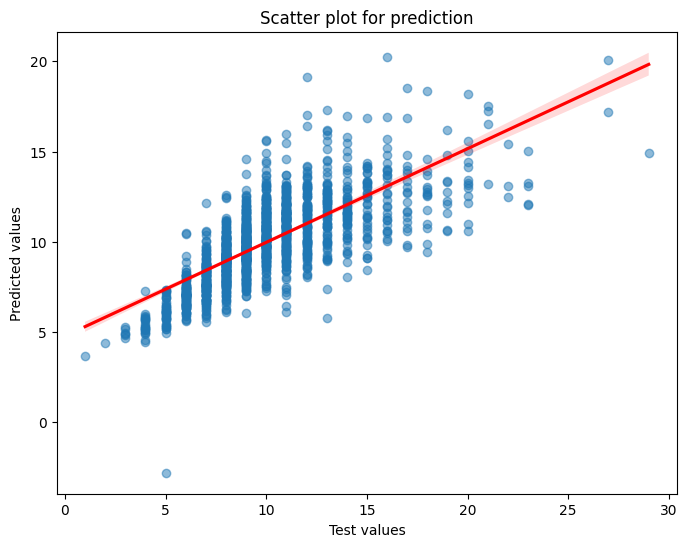

In [17]:
plt.figure(figsize=(8,6))
sns.regplot(x = y_test, y = y_pred, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Scatter plot for prediction')
plt.xlabel('Test values')
plt.ylabel('Predicted values')
plt.savefig('C:/Users/27148/Desktop/jupyter/scatterplot_predict.png')
plt.show()

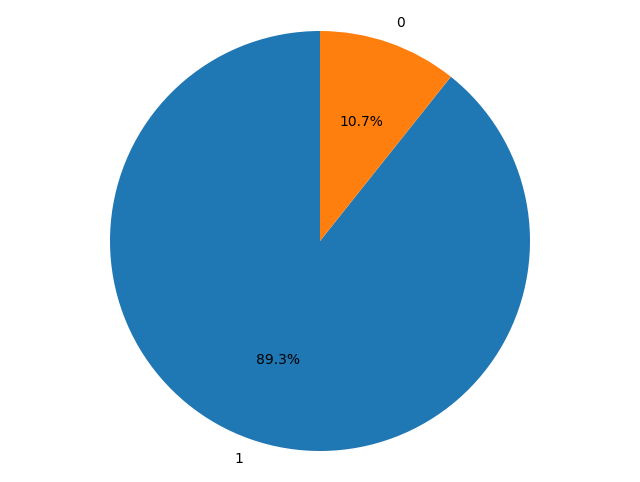

In [18]:
#Logistic regression
y_binary = (y >= 7).astype(int)

count_series = y_binary.value_counts()
plt.figure(figsize = (8, 6))
plt.pie(
    count_series,
    labels = count_series.index,
    autopct = '%1.1f%%',
    startangle = 90)
plt.axis('equal')
plt.show()

In [19]:
for i in range(1,31):
    X_train_lgr, X_test_lgr, y_train_lgr, y_test_lgr = train_test_split(X, y_binary, test_size = 0.4,  random_state = (seed + i))

model = LogisticRegression()
model.fit(X_train_lgr, y_train_lgr)
y_pred = model.predict(X_test_lgr)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [20]:
coefficients = model.coef_[0]
intercept = model.intercept_[0]

for feature, coef in zip(X_train.columns, coefficients):
    print(f'{feature}: {coef}')
print(f'intercep: {intercept}')

con_matrix = confusion_matrix(y_test_lgr, y_pred)
con_matrix

Sex: -0.5559150372165876
Length: 3.4449063270858575
Diameter: 2.7668743408404537
Height: 1.1070211491173738
Whole_weight: 3.8130946249626367
Shucked_weight: 0.6442375795801735
Viscera_weight: 0.9323238395980824
Shell_weight: 2.2435461968899566
intercep: -1.9150743908512964


array([[  97,   75],
       [  32, 1466]])

0.9359281437125748


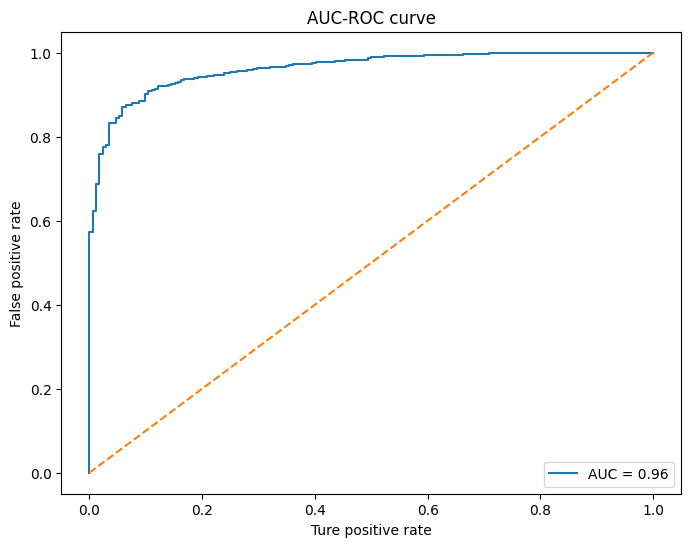

In [21]:
aucc_score = accuracy_score(y_test_lgr, y_pred)
print(aucc_score)

fpr, tpr, thresholds = roc_curve(y_test_lgr, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'AUC = %.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel('Ture positive rate')
plt.ylabel('False positive rate')
plt.title('AUC-ROC curve')
plt.legend(loc = 'lower right')
plt.show()

In [22]:
###Normalization
##Normalizing linear regression
#model before normalizing
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'\nR^2 before normalizing: {r_squared}')
print(f'MSE before normalizing: {mse}')
print(f'RMSE before normalizing: {rmse}')

#model after normalizing
scaler = MinMaxScaler()
X_train_normed = scaler.fit_transform(X_train)
X_test_normed = scaler.transform(X_test)

model_normed = LinearRegression()
model_normed.fit(X_train_normed, y_train)

y_pred_normed = model_normed.predict(X_test_normed)
#y_pred_tarin_normed = model_normed.predict(X_train_normed)

r_squared_normed = r2_score(y_test, y_pred_normed)
mse_normed = mean_squared_error(y_test, y_pred_normed)
rmse_normed = np.sqrt(mse_normed)
print(f'\nR^2 after normalizing: {r_squared_normed}')
print(f'MSE after normalizing: {mse_normed}')
print(f'RMSE after normalizing: {rmse_normed}')

#No siginificant change between the results, so the normalization does not help improve the prediction


R^2 before normalizing: 0.5330249438297476
MSE before normalizing: 4.847257845406587
RMSE before normalizing: 2.2016488924001

R^2 after normalizing: 0.5330249438297471
MSE after normalizing: 4.8472578454065935
RMSE after normalizing: 2.2016488924001014


In [23]:
##Normalizing
#Model before normalizing
for i in range(1,31):
    X_train_lgr, X_test_lgr, y_train_lgr, y_test_lgr = train_test_split(X, y_binary, test_size = 0.4,  random_state = (seed + i))

model = LogisticRegression()
model.fit(X_train_lgr, y_train_lgr)
y_pred = model.predict(X_test_lgr)
y_pred_proba = model.predict_proba(X_test_lgr)[:, 1]
aucc_score = accuracy_score(y_test_lgr, y_pred)
print(aucc_score)

#Model after normalizing
X_train_lgr_normed = scaler.fit_transform(X_train_lgr)
X_test_lgr_normed = scaler.transform(X_test_lgr)

model_normed = LogisticRegression()
model_normed.fit(X_train_lgr_normed, y_train_lgr)
y_pred_normed = model_normed.predict(X_test_lgr)
y_pred_proba_normed = model_normed.predict_proba(X_test_lgr)[:, 1]
aucc_score_normed = accuracy_score(y_test_lgr, y_pred_normed)
print(aucc_score_normed)

#Normalization does not help too much on improving accuracy

0.9359281437125748
0.9167664670658683


E:\app\python\python3.12.5\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
E:\app\python\python3.12.5\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [24]:
#Modeling based on the selected features
X = newdata[['Shell_weight', 'Sex']]
y = newdata['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = (seed))

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_

for feature, coef in zip(X_train.columns, coefficients):
    print(f'{feature}: {coef}')
print(f'intercep: {intercept}')

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'\nR^2: {r_squared}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Shell_weight: 14.052024014004607
Sex: -0.3718403551261544
intercep: 7.001408976555661

R^2: 0.3948571794354967
MSE: 5.816669504724803
RMSE: 2.411777250229549


In [25]:
###Neural Networks Modeling

#9821
train_loss_total = 0
test_loss_total = 0
train_r2_total = 0
test_r2_total = 0

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

class LinearNN(nn.Module):
    def __init__(self, input_size):
        super(LinearNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32) 
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 4)
        self.fc5 = nn.Linear(4, 2)
        self.fc6 = nn.Linear(2, 1)
        self.sig = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.relu = nn.LeakyReLU()
        self.dpout = nn.Dropout(0.1)
        

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sig(out)
        out = self.fc3(out)
        out = self.sig(out)
        out = self.fc4(out)
        out = self.sig(out)
        out = self.fc5(out)
        out = self.sig(out)
        out = self.fc6(out)
        
        #out = self.drop(out)
        #out = self.sig(out)
        
        return out

for i in range(80,90):

    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size = 0.4, random_state = seed + i)
    
    input_size = X_train.shape[1]
    
    model = LinearNN(input_size)
    
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    
    
    num_epochs = 10000
    for epoch in range(num_epochs):
        outputs = model(X_train) 
        loss = criterion(outputs, y_train) 
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        if (epoch+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    
    
    model.eval()
    with torch.no_grad():
        y_pred_train = model(X_train)
        y_pred_test = model(X_test)
        train_loss = criterion(y_pred_train, y_train)
        test_loss = criterion(y_pred_test, y_test)
    
        train_r2 = r2_score(y_train.numpy(), y_pred_train.numpy())
        test_r2 = r2_score(y_test.numpy(), y_pred_test.numpy())
        
        train_loss_total += train_loss
        test_loss_total += test_loss
        train_r2_total += train_r2
        test_r2_total += test_r2


avg_train_loss = train_loss_total / 10
avg_test_loss = test_loss_total / 10
avg_train_r2 = train_r2_total / 10
avg_test_r2 = test_r2_total / 10
print(f'Train Loss: {avg_train_loss.item():.4f}')
print(f'Test Loss: {avg_test_loss.item():.4f}')
print(f'Train R^2: {avg_train_r2:.4f}')
print(f'Test R^2: {avg_test_r2:.4f}')





Epoch [2000/10000], Loss: 6.5817
Epoch [4000/10000], Loss: 6.1354
Epoch [6000/10000], Loss: 6.0576
Epoch [8000/10000], Loss: 6.0037
Epoch [10000/10000], Loss: 5.9695
Epoch [2000/10000], Loss: 6.4899
Epoch [4000/10000], Loss: 6.1179
Epoch [6000/10000], Loss: 6.0440
Epoch [8000/10000], Loss: 5.9874
Epoch [10000/10000], Loss: 5.9543
Epoch [2000/10000], Loss: 6.3445
Epoch [4000/10000], Loss: 6.0582
Epoch [6000/10000], Loss: 5.9763
Epoch [8000/10000], Loss: 5.9242
Epoch [10000/10000], Loss: 5.8928
Epoch [2000/10000], Loss: 6.0111
Epoch [4000/10000], Loss: 5.6939
Epoch [6000/10000], Loss: 5.6397
Epoch [8000/10000], Loss: 5.5854
Epoch [10000/10000], Loss: 5.5530
Epoch [2000/10000], Loss: 10.4627
Epoch [4000/10000], Loss: 6.2870
Epoch [6000/10000], Loss: 6.0505
Epoch [8000/10000], Loss: 5.9615
Epoch [10000/10000], Loss: 5.9082
Epoch [2000/10000], Loss: 6.5402
Epoch [4000/10000], Loss: 6.0878
Epoch [6000/10000], Loss: 5.9891
Epoch [8000/10000], Loss: 5.9385
Epoch [10000/10000], Loss: 5.9090
Epo